##### Name : Vakeesan
##### Index No. : 190643G

##### 1)

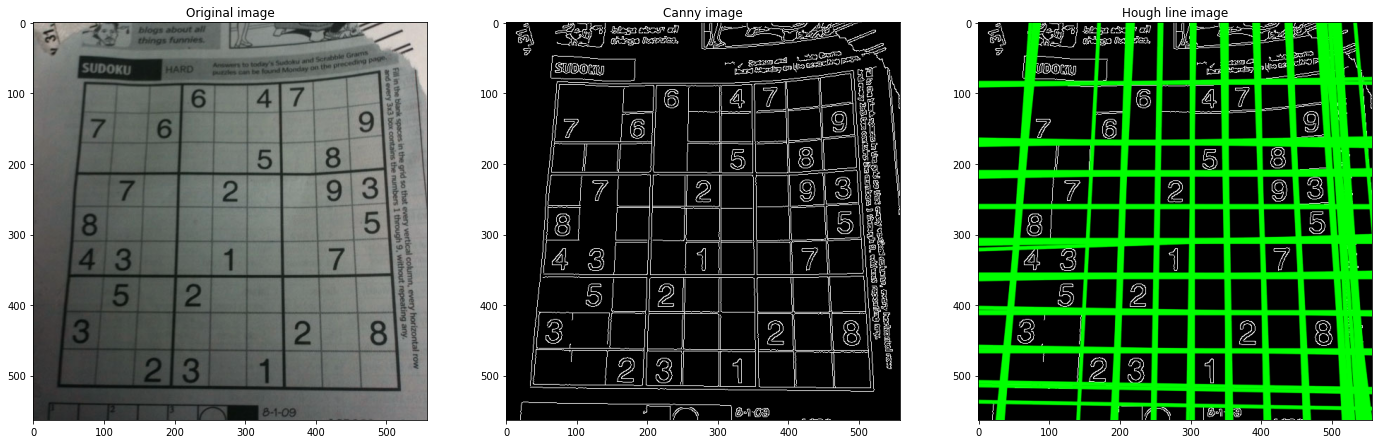

In [2]:
%matplotlib inline
import sys 
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
src =cv.imread(r'C:\Python39\cv\exercices\lec 6\sudoku.png',cv.COLOR_BGR2GRAY)

assert src is not None

dst = cv.Canny(src, 50, 200, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,255,0), 3, cv.LINE_AA)
fig,ax=plt.subplots(1,3,figsize=(24,8))
ax[0].imshow(src,cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(dst,cmap='gray')
ax[1].set_title('Canny image')
ax[2].imshow(cdst,cmap='gray')
ax[2].set_title('Hough line image')
plt.show()


##### 2)

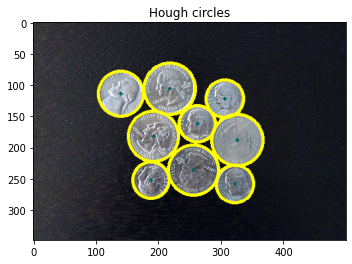

In [3]:
%matplotlib inline
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

src = cv.imread(r'C:\Python39\cv\exercices\lec 6\coins.jpg')
assert src is not None

gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

gray = cv.medianBlur(gray, 5)

rows = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8,
                            param1=100, param2=30,
                            minRadius=1, maxRadius=65)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv.circle(src, center, radius, (255, 255, 0), 3)

plt.imshow(src)
plt.title('Hough circles')
plt.show()


##### 3)

x = 29.0, y = 109.0, orientation =1.0, p1 = 0.0, p2 = (4, 76)


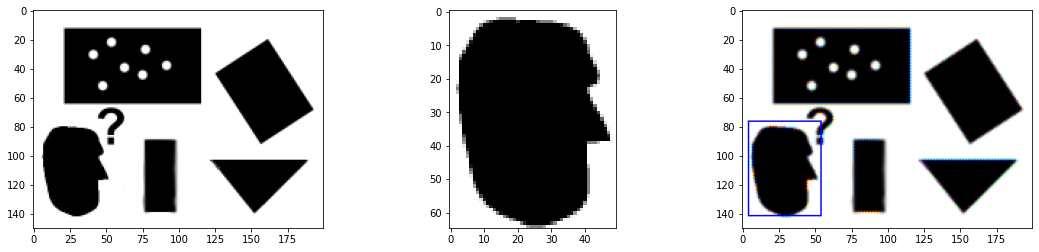

In [22]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Python39\cv\exercices\lec 6\pic1.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
templ = cv.imread(r"C:\Python39\cv\exercices\lec 6\templ.png",cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None


#canny edge detection
im_edges = cv.Canny(img,50,250)
templ_edges = cv.Canny(templ,50,250)

alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, votes = alg.detect(im_edges)
    
out = cv.cvtColor(img,cv.COLOR_BAYER_BG2BGR)  
for x,y,scale, orientation in positions[0]:
    halfHeight = templ.shape[0] /2. *scale
    halfWidth = templ.shape[1]/2. *scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    print("x = {}, y = {}, orientation ={}, p1 = {}, p2 = {}".format(x,y,scale,orientation,p1,p2))
    cv.rectangle(out, p1,p2,(0,0,255))

fig,ax= plt.subplots(1,3,figsize=(18,4))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_GRAY2RGB))
ax[1].imshow(cv.cvtColor(templ,cv.COLOR_GRAY2RGB))
ax[2].imshow(out)
plt.show()


##### 4)

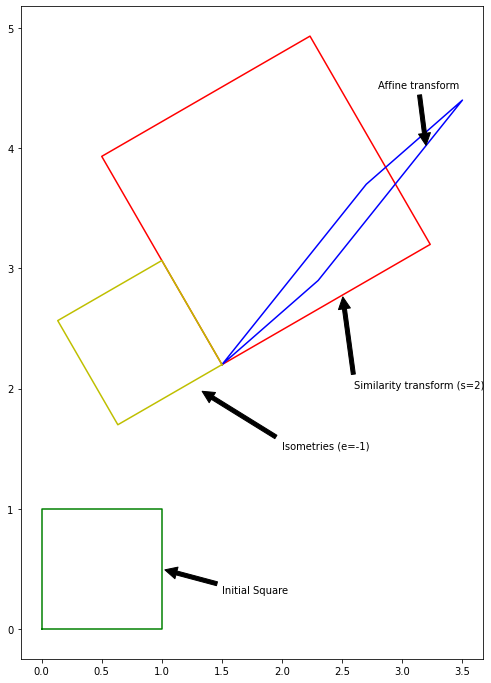

In [79]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#initaial square
a,b,c,d = [0,0,1],[0,1,1],[1,1,1],[1,0,1]
X = np.array([a,b,c,d]).T

#similarity transform
thera =np.pi*30/180
s=2
tx, ty = 1.5,2.2
H = np.array([[s*np.cos(thera), -s*np.sin(thera),tx],[s*np.sin(thera), s*np.cos(thera),ty],[0,0,1]])
Y0 =H@X

#affine transform
a11,a12,a21,a22=0.8,1.2,0.7,1.5
A = np.array([[a11,a12,tx],[a21,a22,ty],[0,0,1]])
Y1 =A@X

#isometrices
e=-1
I = np.array([[e*np.cos(thera), -1*np.sin(thera),tx],[e*np.sin(thera), 1*np.cos(thera),ty],[0,0,1]])
Y2 = I@X

#plot
fig,ax=plt.subplots(1,1,figsize=(15,12))
x=np.append(X[0,:],X[0,0])
y=np.append(X[1,:],X[1,0])
ax.plot(x,y,color='g')
ax.annotate('Initial Square', xy=(1, 0.5), xytext=(1.5, 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
x=np.append(Y0[0,:],Y0[0,0])
y=np.append(Y0[1,:],Y0[1,0])
ax.plot(x,y,color='r')
ax.annotate('Similarity transform (s=2)', xy=(2.5, 2.8), xytext=(2.6, 2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
x=np.append(Y1[0,:],Y1[0,0])
y=np.append(Y1[1,:],Y1[1,0])
ax.plot(x,y,color='b')
ax.annotate('Affine transform', xy=(3.2, 4), xytext=(2.8, 4.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
x=np.append(Y2[0,:],Y2[0,0])
y=np.append(Y2[1,:],Y2[1,0])
ax.plot(x,y,color='y')
ax.set_aspect('equal')
ax.annotate('Isometries (e=-1)', xy=(1.3, 2), xytext=(2, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.show()

##### 5)

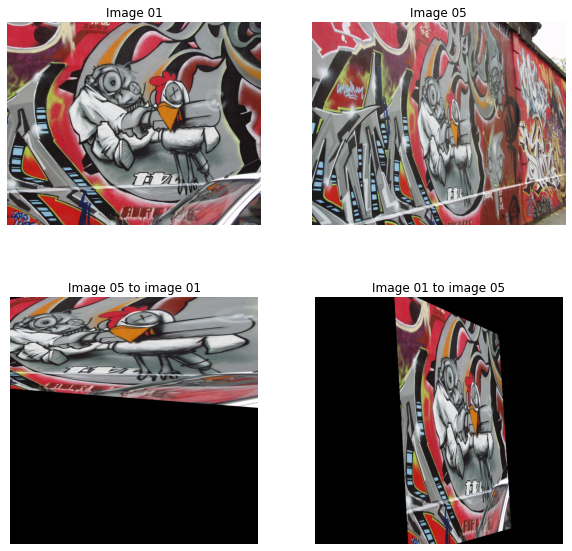

32

In [128]:
#warping using the given homography
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im1 = cv.imread(r'C:\Python39\cv\exercices\lec 6\img1.ppm',cv.IMREAD_ANYCOLOR)
im5 = cv.imread(r'C:\Python39\cv\exercices\lec 6\img5.ppm',cv.IMREAD_ANYCOLOR)

H=np.array([[6.2544644e-01 ,  5.7759174e-02  , 2.2201217e+02],
   [2.2240536e-01 ,  1.1652147e+00 , -2.5605611e+01],
   [4.9212545e-04 , -3.6542424e-05 ,  1.0000000e+00]])
im1to5=cv.warpPerspective(im1,H,(700,700))
im5to1=cv.warpPerspective(im1,np.linalg.inv(H),(1500,1500))

fig,ax=plt.subplots(2,2,figsize=(10,10))
ax[0][0].imshow(cv.cvtColor(im1,cv.COLOR_BGR2RGB))
ax[0][0].axis('off')
ax[0][0].set_title("Image 01")
ax[0][1].imshow(cv.cvtColor(im5,cv.COLOR_BGR2RGB))
ax[0][1].axis('off')
ax[0][1].set_title("Image 05")
ax[1][0].imshow(cv.cvtColor(im5to1,cv.COLOR_BGR2RGB))
ax[1][0].axis('off')
ax[1][0].set_title("Image 05 to image 01")
ax[1][1].imshow(cv.cvtColor(im1to5,cv.COLOR_BGR2RGB))
ax[1][1].axis('off')
ax[1][1].set_title("Image 01 to image 05")
plt.show()